# Data Cleaning

In [2]:

# summarize the number of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('data/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 
for i in range(data.shape[1]):
  print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


### Variables or columns that have a single value should probably be removed from your dataset

In [3]:
from pandas import read_csv
# load the dataset
df = read_csv('data/oil-spill.csv', header=None) 
print(df.shape)

counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]

(937, 50)


In [5]:
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

[22]
(937, 49)


In [7]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('data/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 
for i in range(data.shape[1]):
  num = len(unique(data[:, i]))
  percentage = float(num) / data.shape[0] * 100 
  print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [9]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('data/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 
for i in range(data.shape[1]):
  num = len(unique(data[:, i]))
  percentage = float(num) / data.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [14]:

# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# load the dataset
df = read_csv('data/oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1] 
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


In [15]:
# example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold # load the dataset
df = read_csv('data/oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


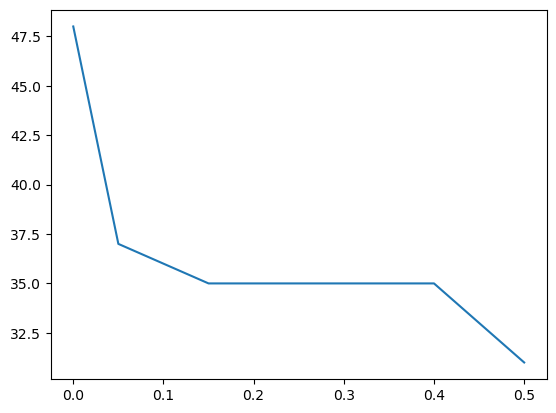

In [17]:

# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold 
from matplotlib import pyplot
# load the dataset
df = read_csv('data/oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
  # define the transform
  transform = VarianceThreshold(threshold=t)
  # transform the input data
  X_sel = transform.fit_transform(X)
  # determine the number of input features
  n_features = X_sel.shape[1]
  print('>Threshold=%.2f, Features=%d' % (t, n_features)) # store the result
  results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

## Outlier Identification and Removal

In [18]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off # identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


## Removing outliers from the dataset

In [20]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('data/housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements

X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
MAE: 3.356


## How to Use Statistical Imputation

In [21]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten())) # define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


In [22]:

# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.869 (0.049)


>mean 0.867 (0.053)
>median 0.871 (0.055)
>most_frequent 0.871 (0.060)
>constant 0.873 (0.047)


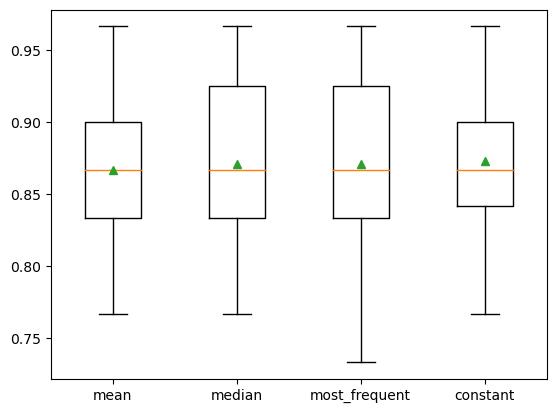

In [24]:

# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

## How to Use KNN Imputation

In [25]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column 
for i in range(dataframe.shape[1]):
  # count number of rows with missing values
  n_miss = dataframe[[i]].isnull().sum()
  perc = n_miss / dataframe.shape[0] * 100
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_61613/1725560806.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_61613/1725560806.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_61613/1725560806.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_61613/1725560806.py:11: FutureWarning: Calling float on a single element Series is deprecated and

## KNNImputer Data Transform

### The KNNImputer is a data transform that is first configured based on the method used to estimate the missing values. The default distance measure is a Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset. This is set via the metric argument. The number of neighbors is set to five by default and can be configured by the n neighbors argument.

### Finally, the distance measure can be weighed proportional to the distance between instances (rows), although this is set to a uniform weighting by default, controlled via the weights argument.

In [26]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


In [28]:

# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()

pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.864 (0.059)


#### The key hyperparameter for the KNN algorithm is k; that controls the number of nearest neighbors that are used to contribute to a prediction. It is good practice to test a suite of different values for k. The example below evaluates model pipelines and compares odd values for k from 1 to 21.

>1 0.864 (0.053)
>3 0.856 (0.056)
>5 0.861 (0.058)
>7 0.864 (0.057)
>9 0.862 (0.053)
>15 0.867 (0.059)
>18 0.858 (0.052)
>21 0.866 (0.057)


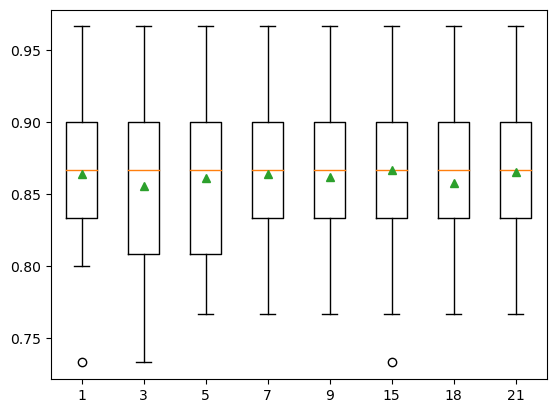

In [30]:
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
    # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [31]:
# knn imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m',
    RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
    8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


## How to Use Iterative Imputation

#### One approach to imputing missing values is to use an iterative imputation model. Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

#### It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated. This approach may be generally referred to as fully conditional specification (FCS) or multivariate imputation by chained equations (MICE).

In [1]:

# iterative imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


In [3]:
# evaluate iterative imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.873 (0.053)


>ascending 0.867 (0.048)
>descending 0.867 (0.049)
>roman 0.871 (0.056)
>arabic 0.867 (0.049)
>random 0.873 (0.053)


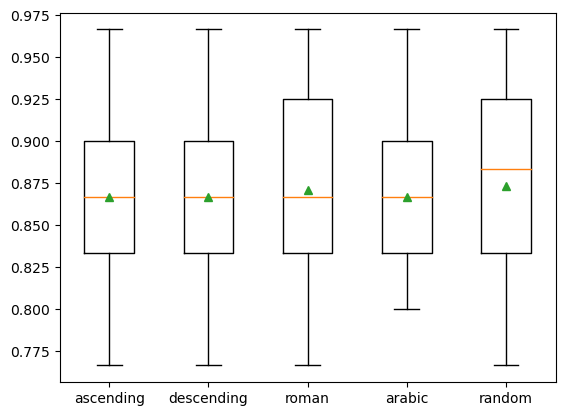

In [5]:

# compare iterative imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random'] 
for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
    # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

>1 0.872 (0.052)
>2 0.873 (0.055)
>3 0.868 (0.046)
>4 0.872 (0.050)
>5 0.874 (0.051)
>6 0.873 (0.050)
>7 0.870 (0.051)
>8 0.877 (0.053)
>9 0.871 (0.050)
>10 0.874 (0.050)
>11 0.869 (0.054)
>12 0.869 (0.049)
>13 0.871 (0.051)
>14 0.869 (0.053)
>15 0.871 (0.054)
>16 0.861 (0.052)
>17 0.867 (0.054)
>18 0.872 (0.050)
>19 0.868 (0.055)
>20 0.877 (0.051)


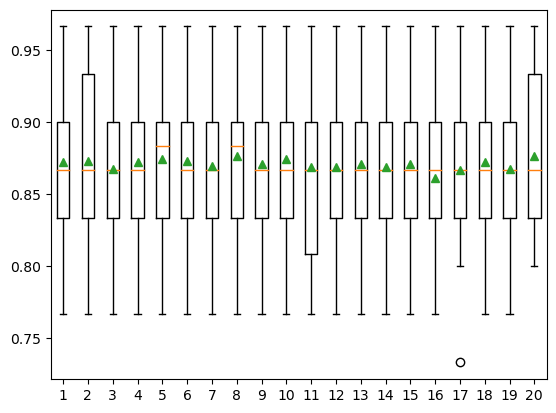

In [6]:
# compare iterative imputation number of iterations for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('data/horse-colic.csv', header=None, na_values='?') # split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]
for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m', RandomForestClassifier())])
    # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()
